# Modelos de Regresion Lineal

## Modelo con datos simulados

**y = a + b * x**

* x : 100 valores distribuidos segun una N(1.5, 2.5)

* Ye = 8 + 1.8 + x + e

* **e** estara distribuida segun una N(0, 0.8

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5.3 + 0.8 *x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_act": y_act_list,
        "y_pred": y_pred_list
    
    }
)

In [8]:
data.head()

,x,y_act,y_pred
0,0.529023,6.976681,5.158707
1,-0.192016,4.576748,4.942395
2,1.377378,7.296643,5.413214
3,-0.759827,5.279310,4.772052
4,1.633144,5.931285,5.489943


In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

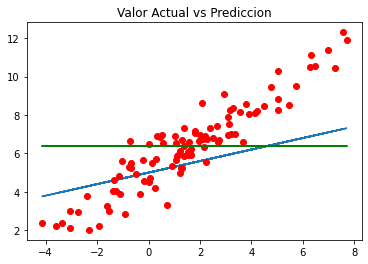

In [12]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccion")

In [13]:
data["SSR"]=(data["y_pred"]-np.mean(y_act))**2
data["SSD"]=(data["y_pred"]-data["y_act"])**2
data["SST"]=(data["y_act"]-np.mean(y_act))**2

In [14]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,0.529023,6.976681,5.158707,1.495504,3.305029,0.354104
1,-0.192016,4.576748,4.942395,2.071354,0.133698,3.257544
2,1.377378,7.296643,5.413214,0.937801,3.547306,0.837276
3,-0.759827,5.279310,4.772052,2.590693,0.257311,1.215076
4,1.633144,5.931285,5.489943,0.795079,0.194783,0.202797


In [15]:
SSR =sum(data["SSR"])
SSD =sum(data["SSD"])
SST =sum(data["SST"])

In [16]:
SSR

144.80012995843512

In [17]:
SSD

321.5588379108383

In [18]:
SST

501.41623780084734

In [19]:
SSR+SSD

466.35896786927344

In [20]:
R2 = SSR/SST

In [21]:
R2

0.2887822911230627

(array([ 2.,  5.,  4.,  5., 21., 21., 17., 11.,  7.,  7.]),
 array([-5.03768507, -4.30501606, -3.57234704, -2.83967802, -2.107009  ,
        -1.37433999, -0.64167097,  0.09099805,  0.82366706,  1.55633608,
         2.2890051 ]),
 <BarContainer object of 10 artists>)

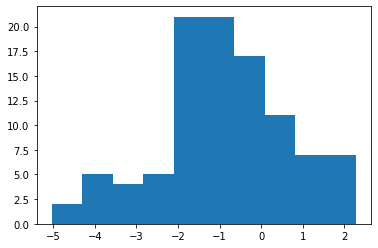

In [22]:
plt.hist(data['y_pred']-data["y_act"])

# Obteniendo la recta de regresion


* y = a + b ^ x
* b = sum((xi-x_m)^(y_1-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [23]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean,y_mean

(1.5384323511034446, 6.381615008366533)

In [24]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_act"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [25]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [26]:
alpha= y_mean - beta * x_mean

In [27]:
alpha,beta


(5.135954475595808, 0.8096947076530677)

El modelo lineal obtenido por regresion es: 
     **(7.903538645710322, 1.8442729997031548)**

In [28]:
data["y_model"] = alpha + beta * data["x"]

In [29]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.529023,6.976681,5.158707,1.495504,3.305029,0.354104,-0.600665,1.018907,5.564302
1,-0.192016,4.576748,4.942395,2.071354,0.133698,3.257544,3.123229,2.994453,4.980480
2,1.377378,7.296643,5.413214,0.937801,3.547306,0.837276,-0.147369,0.025938,6.251211
3,-0.759827,5.279310,4.772052,2.590693,0.257311,1.215076,2.533382,5.281994,4.520727
4,1.633144,5.931285,5.489943,0.795079,0.194783,0.202797,-0.042651,0.008970,6.458303


In [30]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_act"])**2)
SST = sum((data["y_act"]-y_mean)**2)

In [31]:
SSR, SSD, SST

(438.1224728633388, 63.29376493750854, 501.41623780084734)

In [32]:
R2 = SSR / SST

In [33]:
R2

0.8737700134819975

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

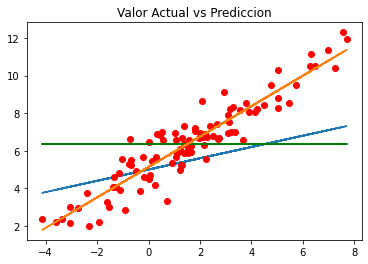

In [34]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y_act"],"ro")
plt.plot(data["x"],y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Prediccion")